# 10.2 Small Multiples

Rather than try to pack as much information into a single plot as possible, we can juxtapose multiple plots, each showing the data from a slightly different angle. Edward Tufte coined the term "small multiples" to refer to this type of graphic.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

housing = pd.read_csv("../data/AmesHousing.txt", sep="\t")

For example, suppose we want to show the relationship between house price and square footage, for each of the five building types.

In [2]:
bldg_types = housing["Bldg Type"].unique()
bldg_types

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [3]:
housing["Bldg Type"].value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg Type, dtype: int64

We can make five plots, stacked on top of one another in a single figure, using the `plt.subplots()` command. This command takes in the number of plots and returns a `Figure` object and an array of `AxesSubplot` objects.

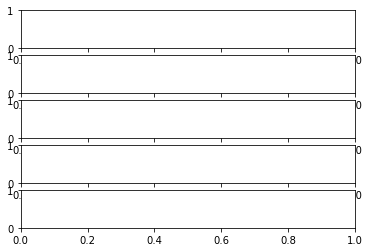

In [5]:
fig, axes = plt.subplots(5)


Next, we add a plot to each of the `AxesSubplot` objects. To do this, we iterate over the different building types, subset the data to each building type, and call the corresponding `pandas` plotting function. We have to pass the `AxesSubplot` object to the `pandas` plotting function so that it knows where the plot should be drawn.

In [6]:
axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

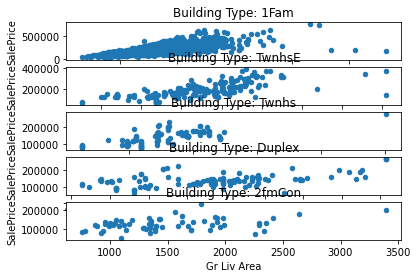

In [7]:
fig, axes = plt.subplots(5)

for ax, bldg_type in zip(axes, housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title("Building Type: "+bldg_type)

The aspect ratios of the individual plots are now distorted because the same figure size must now accommodate five plots. To give each plot a reasonable aspect ratio, the size of the figure has to be changed. We can set the figure size manually using the `figsize=` argument to `plt.subplots()`.

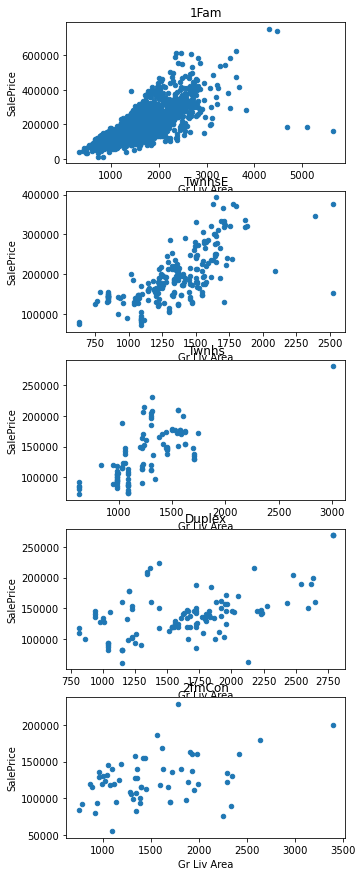

In [8]:
fig, axes = plt.subplots(len(bldg_types), figsize=(5, 15))

for ax, bldg_type in zip(axes, housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)

Notice that the $x$-axis of each plot is different. This makes it difficult to compare the plots. Since the plots are aligned vertically, it makes sense to use a common $x$-axis for all of the plots. We can do this by specifying `sharex=True` in `plt.subplots()`. (There is also a `sharey=` argument.) This will also solve another problem in the figure above---the overlap between the titles and the $x$-axis labels---since only the last plot will have an $x$-axis label.

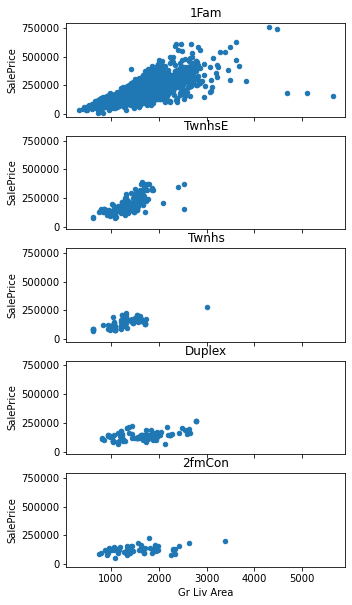

In [11]:
fig, axes = plt.subplots(len(bldg_types), figsize=(5, 10), sharex=True, sharey=True)

for ax, bldg_type in zip(axes, housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)

## Rectangular Grid of Plots

We can also make a rectangular grid of plots. For example, to display the 5 plots above in a 2 x 3 grid,  we pass in two numbers to `plt.subplots()`. The first number indicates the number of rows in the grid, while the second number indicates the number of columns.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

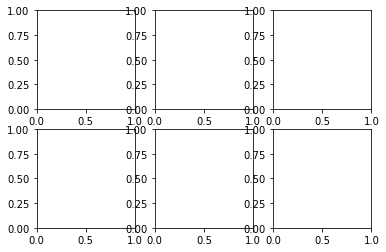

In [8]:
fig, axes = plt.subplots(2, 3)
axes

Notice that `axes` is now a 2-dimensional array of `AxesSubplot` objects. One way to iterate over this array is to flatten the `axes` into a 1-dimensional array and proceed exactly as before. (Another way is to iterate directly over the 2-dimensional array using nested `for` loops.)

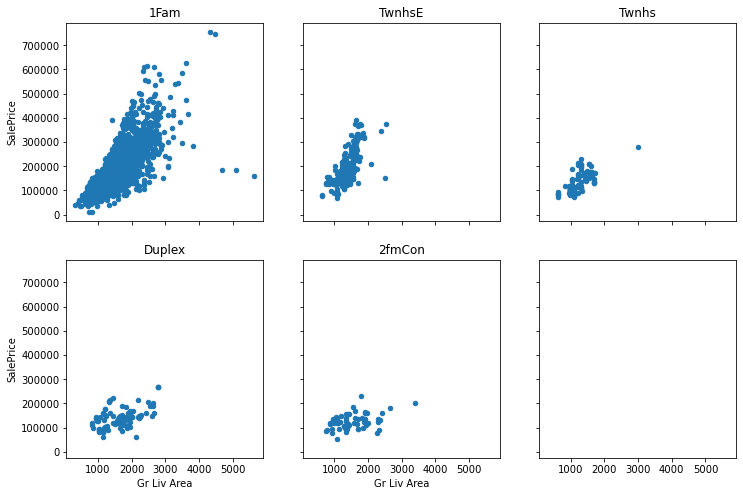

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

for ax, bldg_type in zip(axes.flatten(), housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)

There is a blank plot at the end because there is room for 6 plots, but only 5 plots to make. We can hide this last plot by simply turning off the axes.

(68.59999999999997, 5907.4, -24321.550000000003, 792110.55)

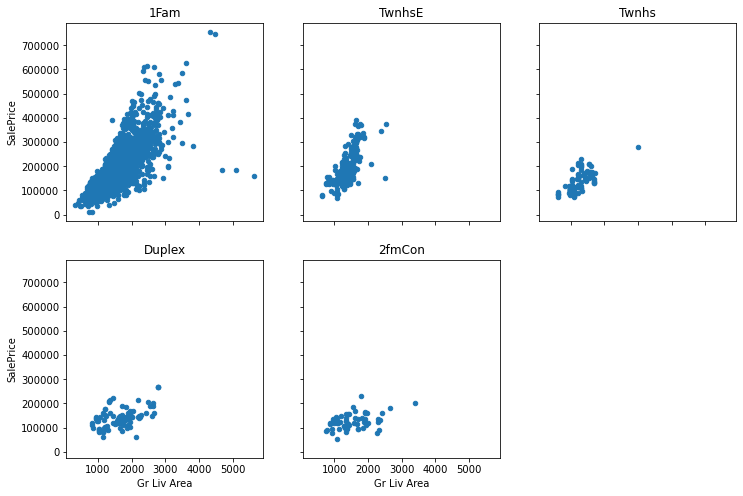

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

for ax, bldg_type in zip(axes.flatten(), housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    ax.set_title(bldg_type)
    
axes[1, 2].axis("off")

# Exercises

**Exercise 1.** Show the relationship between house price and square footage, for each building type, in a single "small multiple" graphic, with the plots arranged side-by-side in a single row. 

In [ ]:
# TYPE YOUR CODE HERE

**Exercise 2.** In the previous section, you made a single plot to communicate the information in the Tips data set (`/data301/data/tips.csv`), but you most likely had to omit some of the variables from your graphic. Now, use the "small multiples" principle to incorporate some of these variables into your graphic.

In [ ]:
# TYPE YOUR CODE HERE